# CA3 INT353 #

|Name|R Sahil Sharma|
|---|---|
|Roll No|RK20CHA01|
|Reg. No|12015815|

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
# loading the dataset
df_athletes = pd.read_csv('./Olympics/athlete_events.csv')
df_regions = pd.read_csv('./Olympics/noc_regions.csv')

Athletes Events table

In [24]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Regions Table

In [25]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Merging the regions table in the athletes table

In [26]:
athletes = df_athletes.merge(df_regions, on='NOC', how='left')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [27]:
# keep column naming consistent
athletes.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True);

What are the values in the notes column?

In [28]:
notes_counts = athletes[athletes['Notes'].isna() == False].Notes.value_counts()
print(notes_counts.shape)
notes_counts
# looks like some athletes were of "UnKnown" notes areas

(21,)


Yugoslavia                     2583
Hong Kong                       685
Trinidad and Tobago             375
Serbia and Montenegro           321
Virgin Islands                  294
Bohemia                         153
Antigua and Barbuda             133
United Arab Republic            123
Individual Olympic Athletes      94
Australasia                      86
Netherlands Antilles             79
Turks and Caicos Islands         42
West Indies Federation           20
Refugee Olympic Team             12
North Yemen                      11
Crete                            11
Tuvalu                            7
South Yemen                       5
North Borneo                      2
Unknown                           2
Newfoundland                      1
Name: Notes, dtype: int64

In [29]:
region_counts = athletes[athletes['Notes'].isna() == False].Region.value_counts()
print(region_counts.shape)
region_counts
# looks like the region has different values than the notes, 6 notes_counts vanished, new region_counts added

(15,)


Serbia                         2904
China                           685
Trinidad                        395
Virgin Islands, US              294
Czech Republic                  153
Antigua                         133
Syria                           123
Individual Olympic Athletes      94
Australia                        86
Curacao                          79
Saint Kitts                      42
Yemen                            16
Greece                           11
Malaysia                          2
Canada                            1
Name: Region, dtype: int64

Medal Column order, using CategoricalDtype()

In [30]:
from pandas.api.types import CategoricalDtype as CDtype

In [31]:
medal_order = ['Bronze','Silver','Gold']
medal_type = CDtype(categories=medal_order,ordered=True)
athletes['Medal'] = athletes['Medal'].astype(medal_type)

athletes.Medal.unique()

[NaN, 'Gold', 'Bronze', 'Silver']
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

Dividing the Age into 4 ordered age groups for better analysis

In [32]:
athletes['Age_g'] = pd.cut(athletes['Age'],bins=[0,15,30,45,100], labels=['0-15','15-30','30-45','45-100'], include_lowest=True)
athletes.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_g
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,15-30


In [33]:
age_order = ['0-15','15-30','30-45','45-100']
age_g_type = CDtype(categories = age_order, ordered = True)
athletes['Age_g'] = athletes['Age_g'].astype(age_g_type)

athletes.Age_g.unique()

['15-30', '30-45', '45-100', NaN, '0-15']
Categories (4, object): ['0-15' < '15-30' < '30-45' < '45-100']

Creating a new feature: "W / H ratio" by dividing Weight by Height.

In [34]:
athletes['W_H_Ratio'] = athletes.Weight / athletes.Height
athletes.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_g,W_H_Ratio
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,15-30,0.444444


#### Multivariate Exploration ####

W_H_Ratio - Gender relation by Age group

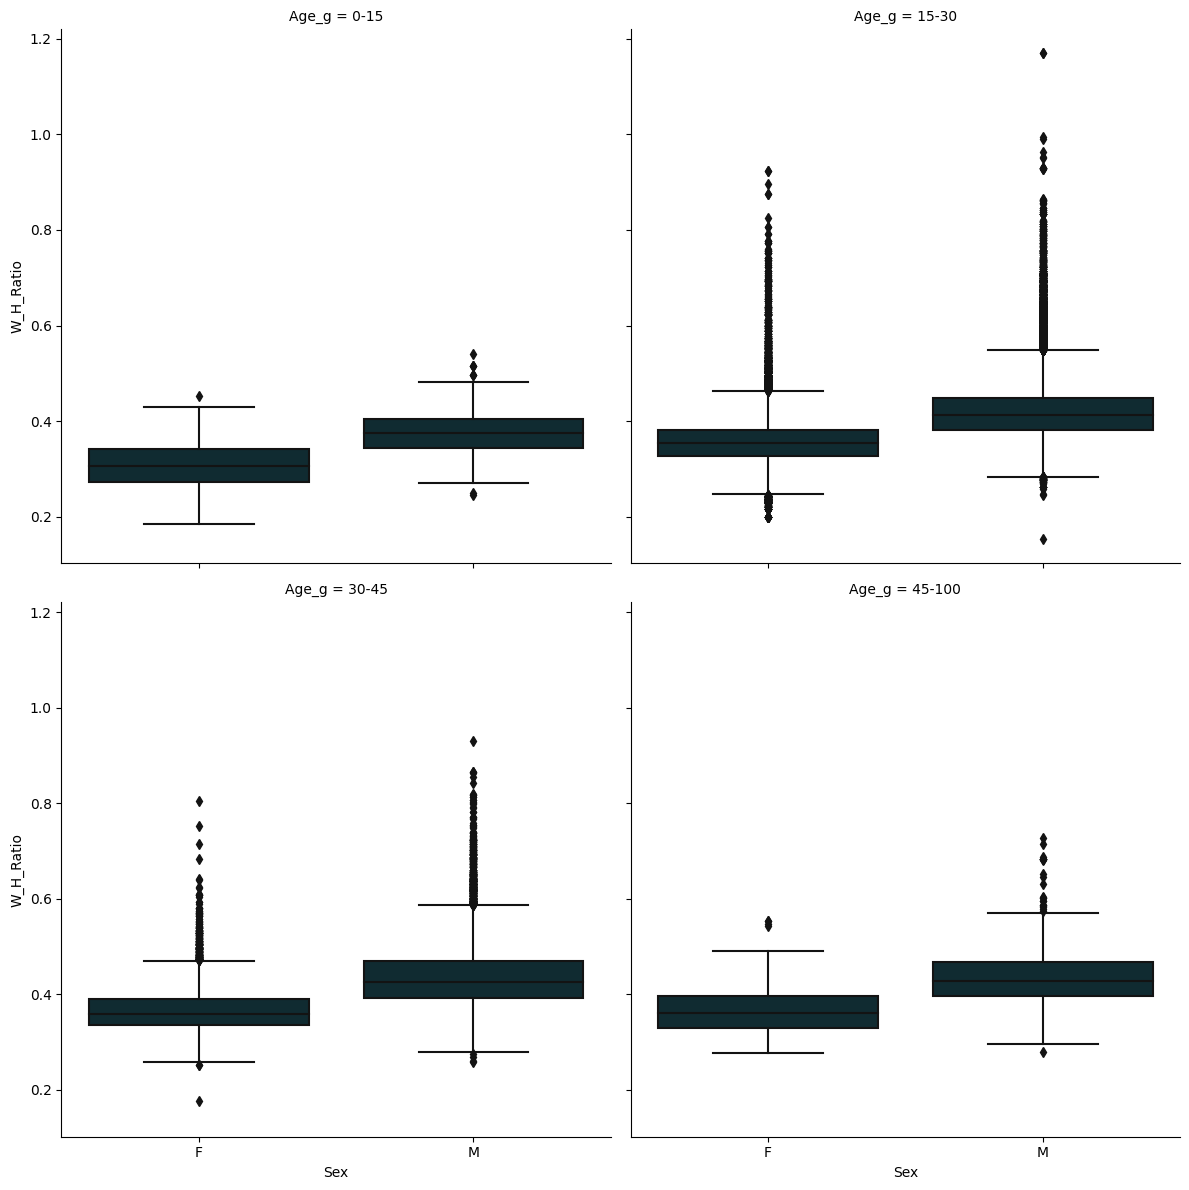

In [35]:
g = sns.FacetGrid(data = athletes, col='Age_g', col_wrap=2, height=6)
g.map(sns.boxplot, 'Sex', 'W_H_Ratio', order=['F','M'])
plt.tight_layout();

W_H_Ratio - Age_g by Gender

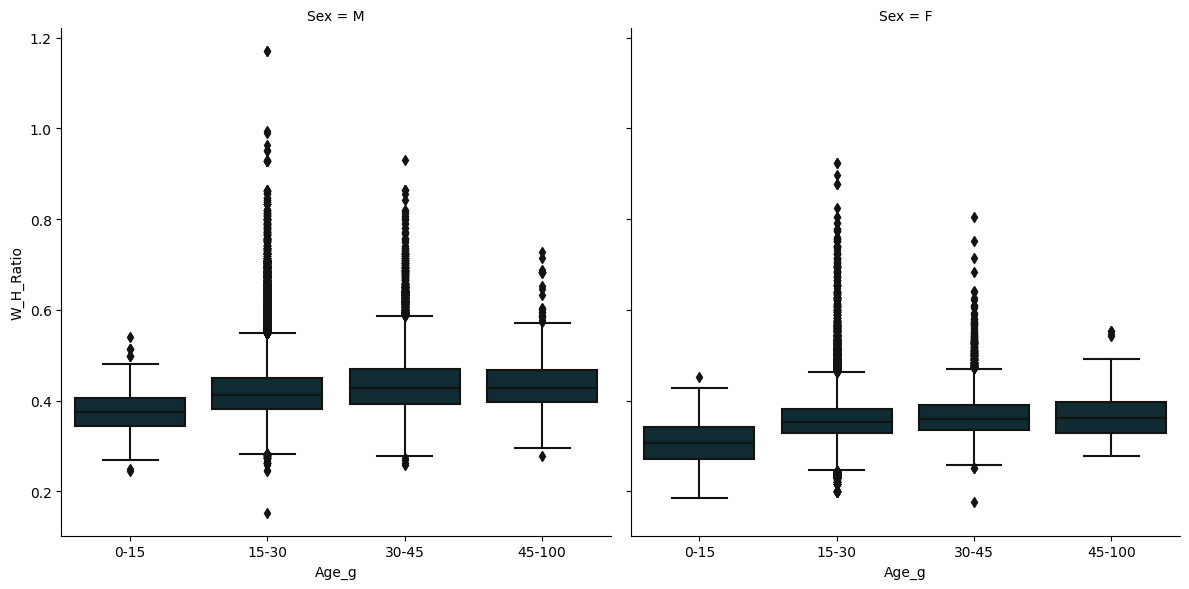

In [36]:
g = sns.FacetGrid(data = athletes, col='Sex', col_wrap=2, height=6)
g.map(sns.boxplot, 'Age_g', 'W_H_Ratio',order=athletes.Age_g.unique().categories.tolist())
plt.tight_layout();

Age_g, W_H_Ratio, Height Scatter plot

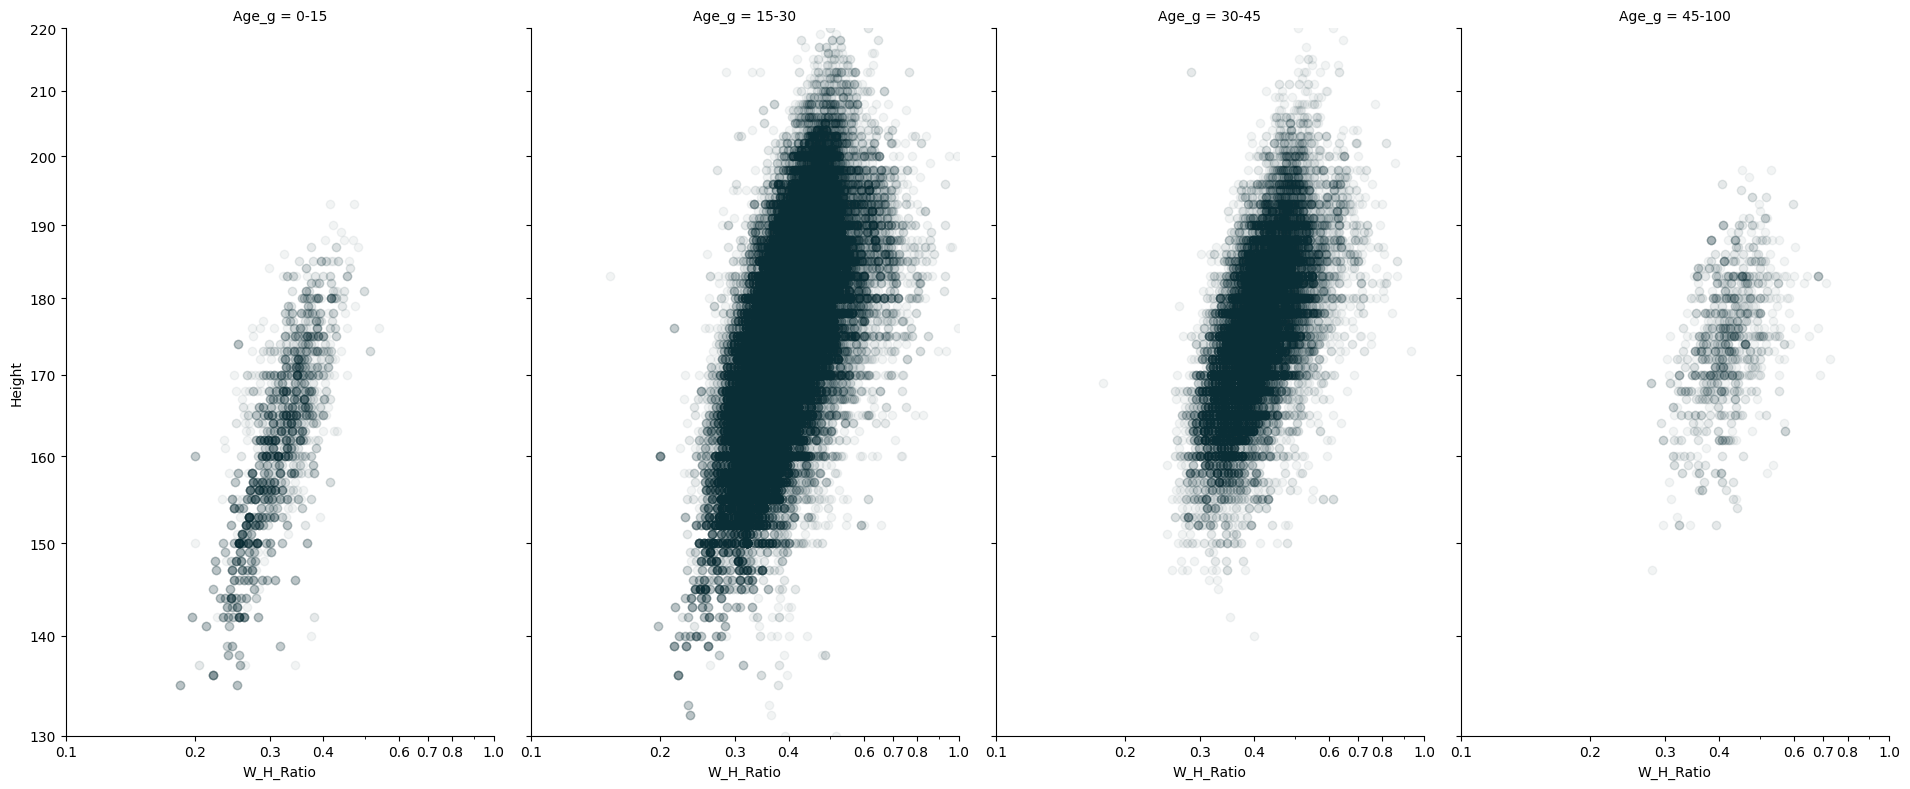

In [37]:
w_ticks = [0.1,0.2,0.3,0.4,0.6,0.7,0.8,1.0]
h_ticks = [130,140,150,160,170,180,190,200,210,220]
w_labels = ['{:.1f}'.format(t) for t in w_ticks]
h_labels = ['{:.1f}'.format(t) for t in h_ticks]

g = sns.FacetGrid(data = athletes, col='Age_g', col_wrap=4, height=8, aspect=0.6)
g.map(plt.scatter, 'W_H_Ratio', 'Height', alpha=0.05)
g.set(yscale='log', yticks=h_ticks, yticklabels=h_labels, ylim=(130,220), \
      xscale='log', xticks=w_ticks, xticklabels=w_labels, xlim=(0.15,1.0))

plt.xticks(w_ticks, w_ticks)
plt.yticks(h_ticks, h_ticks)
plt.tight_layout();

Scatter plot of W_H_Ratio, Height, grouped by Age and color coded by Medal type

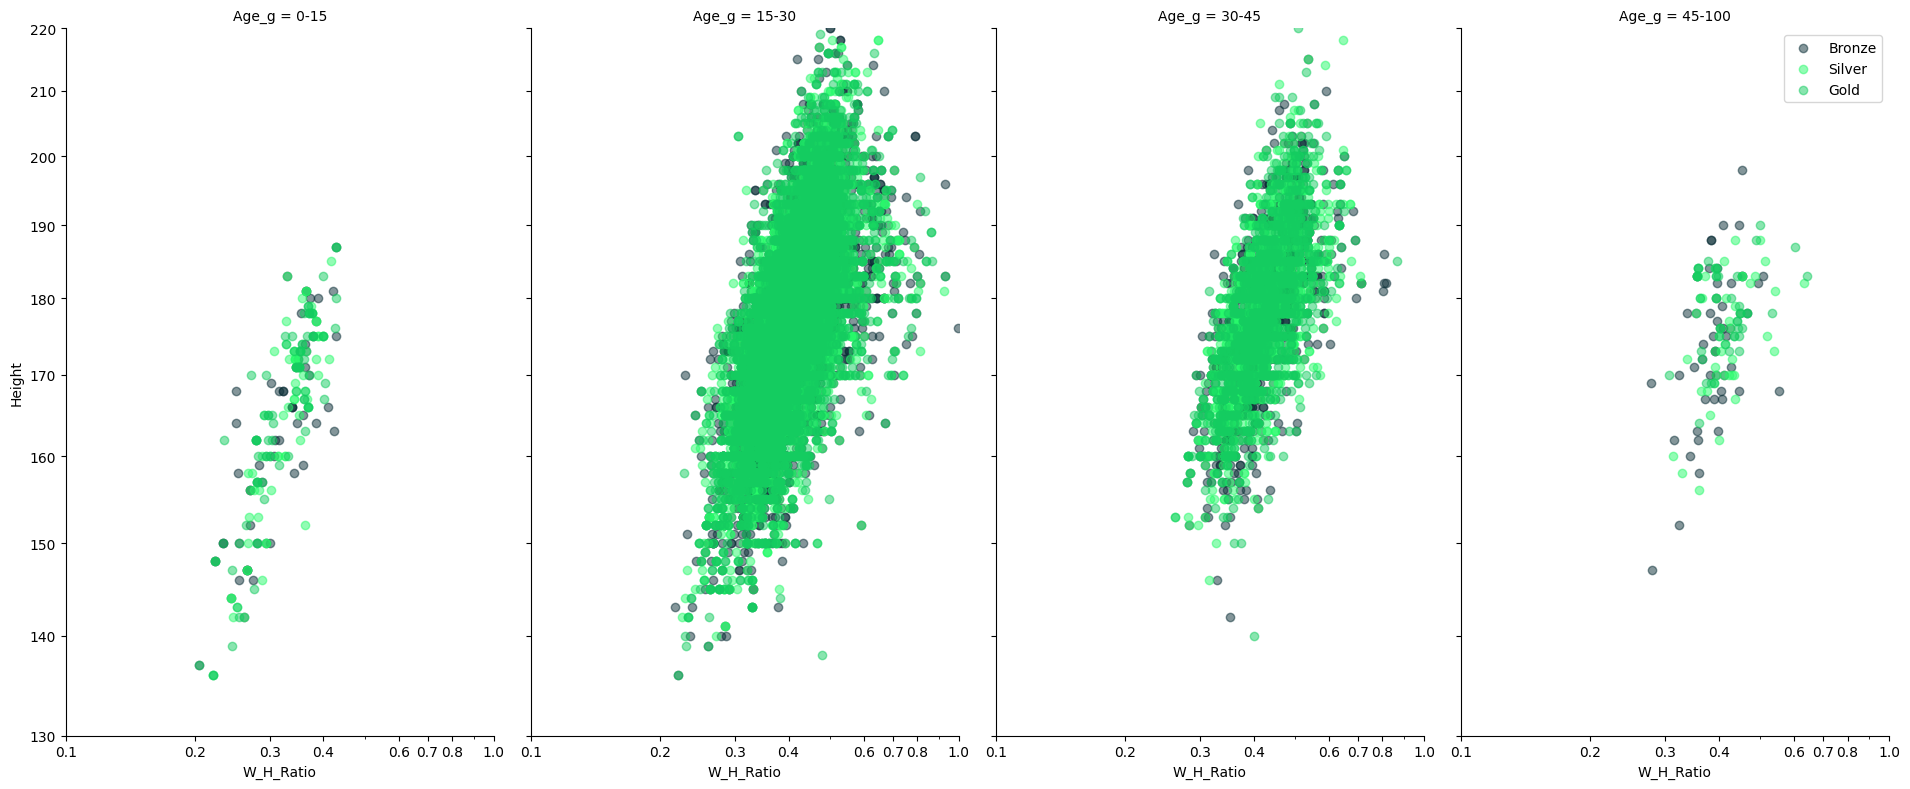

In [38]:
g = sns.FacetGrid(data  = athletes[athletes['Medal'].isna() == False], hue='Medal', col='Age_g', col_wrap=4, height=8, aspect=0.6)
g.map(plt.scatter, 'W_H_Ratio', 'Height', alpha=0.5)
g.set(yscale='log', ylim=(130,220), xscale='log', xlim=(0.15,1.0))

plt.xticks(w_ticks, w_ticks)
plt.yticks(h_ticks, h_ticks)
plt.legend()
plt.tight_layout();

Not much info. from the Medal colored scatter plots.

Scatter plot of W_H_Ratio, Height, grouped by Gender and color coded by Medal type

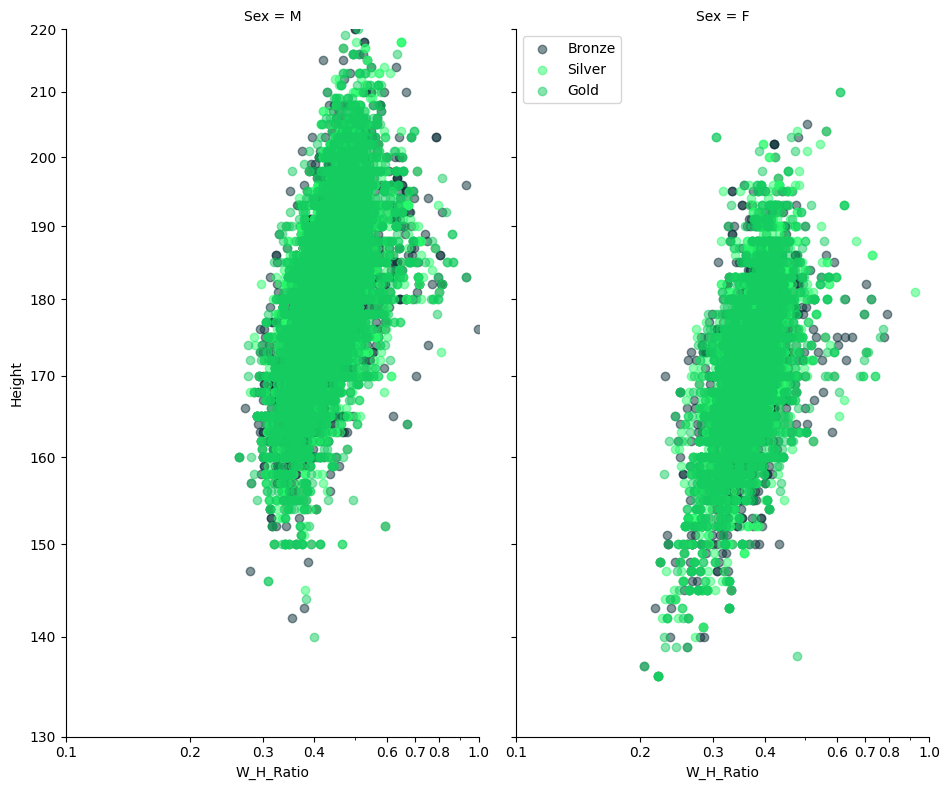

In [39]:
g = sns.FacetGrid(data = athletes[athletes['Medal'].isna() == False], hue='Medal', col='Sex', col_wrap=2, height=8, aspect=0.6)
g.map(plt.scatter, 'W_H_Ratio', 'Height', alpha=0.5)
g.set(yscale='log', ylim=(130,220), xscale='log', xlim=(0.2,1.0))

plt.xticks(w_ticks, w_ticks)
plt.yticks(h_ticks, h_ticks)
plt.legend()
plt.tight_layout();

Age_g, W_H_Ratio with Gender and Medal types

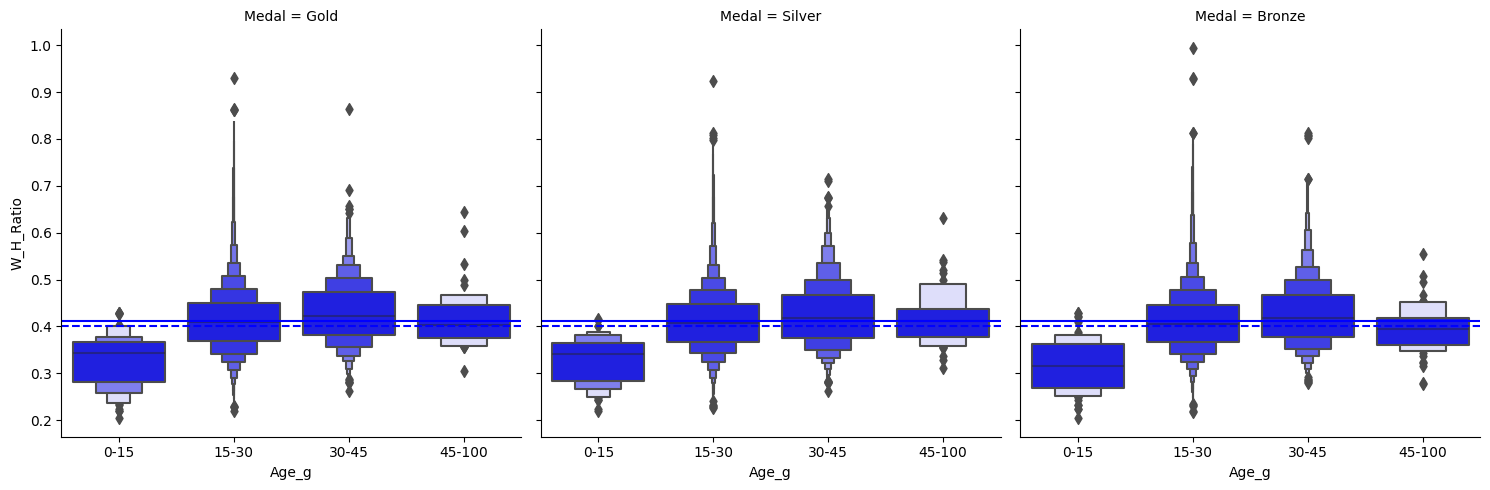

In [40]:
g = sns.FacetGrid(data = athletes[athletes['Medal'].isna() == False], col='Medal', col_wrap=3, height=5,col_order=['Gold','Silver','Bronze'])
g.map(sns.boxenplot, 'Age_g', 'W_H_Ratio', order=athletes.Age_g.unique().categories.tolist(), color='blue')
g.map(plt.axhline, y=athletes[athletes['Medal'].isna() == False].W_H_Ratio.mean(), c='b')
g.map(plt.axhline, y=athletes.W_H_Ratio.mean(), c='b', linestyle='--');

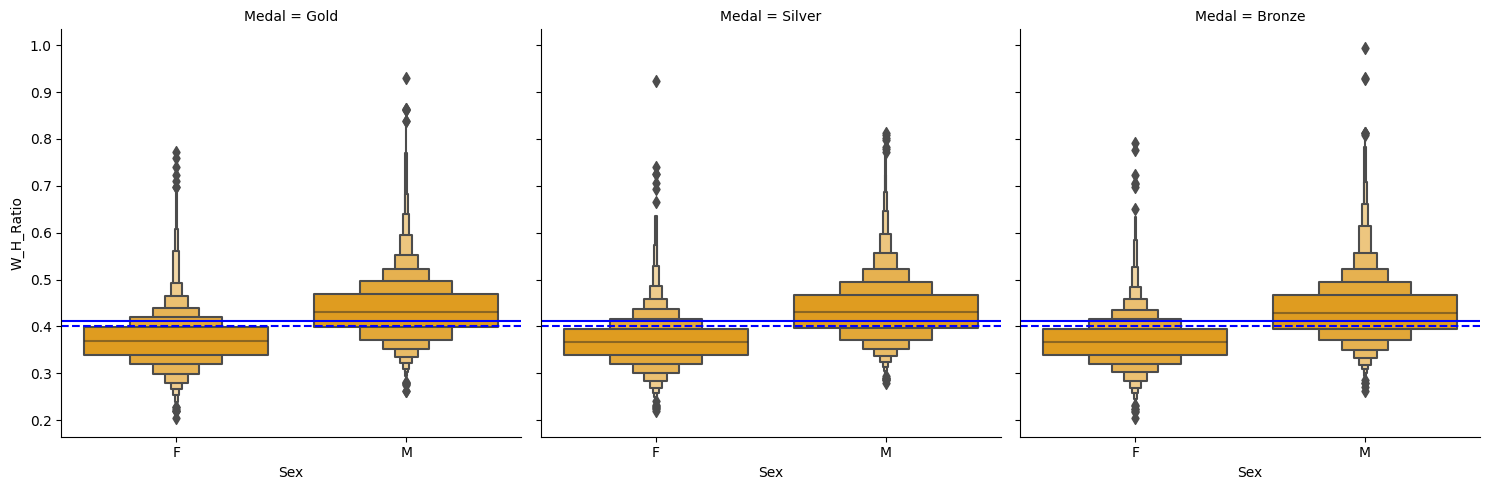

In [41]:
g = sns.FacetGrid(data = athletes[athletes['Medal'].isna() == False], col='Medal', col_wrap=3, height=5,col_order=['Gold','Silver','Bronze'])
g.map(sns.boxenplot, 'Sex', 'W_H_Ratio', order=['F','M'], color='orange')
g.map(plt.axhline, y=athletes[athletes['Medal'].isna() == False].W_H_Ratio.mean(), c='b')
g.map(plt.axhline, y=athletes.W_H_Ratio.mean(), c='b', linestyle='--');

### The Relation Between Various Features And Labels In The Olympics Dataset ###

c:\Users\rsahi\miniconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
c:\Users\rsahi\miniconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
c:\Users\rsahi\miniconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
c:\U

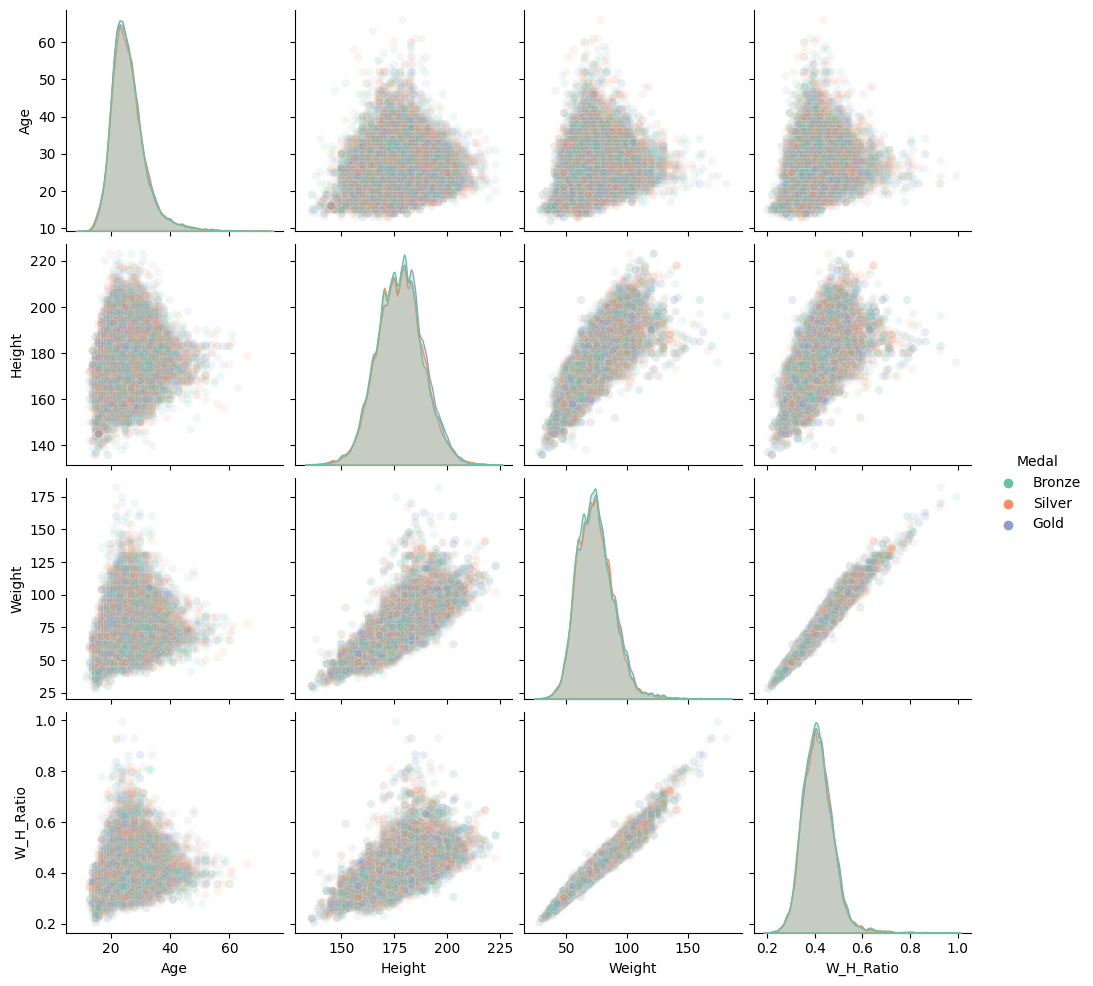

In [44]:
palette= sns.set_palette(sns.color_palette("Set2", 10))
#The pairplot function creates a grid of Axes in which each variable in the data is shared across a single row and a single column on the y-axis.
sns.pairplot(athletes,palette=palette, hue='Medal', vars=['Age','Height','Weight','W_H_Ratio'], diag_kind='kde', diag_kws={'bw':0.1}, plot_kws={'alpha':0.1});



Inference: Well, we can clearly see a sort of a trend in the relationship between various parameters in our dataset.

    For example: We can see that trend in height and weight has increased over the years. However the age of the participants has been almost uniform (consistant) over the years.
    Now, lets go ahead and explore each one of them!

In [45]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_g,W_H_Ratio
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,15-30,0.444444
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,15-30,0.352941
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,15-30,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,30-45,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,15-30,0.443243


In [48]:
usa_medal_df=athletes[athletes['Team']=="United States"].reset_index()
usa_medal_df.head(11).style.background_gradient(cmap='Greens',axis=0)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_g,W_H_Ratio
0,10,6,Per Knut Aaland,M,31.000000,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,USA,nan,30-45,0.398936
1,11,6,Per Knut Aaland,M,31.000000,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,nan,USA,nan,30-45,0.398936
2,12,6,Per Knut Aaland,M,31.000000,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,USA,nan,30-45,0.398936
3,13,6,Per Knut Aaland,M,31.000000,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,USA,nan,30-45,0.398936
4,14,6,Per Knut Aaland,M,33.000000,188.000000,75.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,USA,nan,30-45,0.398936
5,15,6,Per Knut Aaland,M,33.000000,188.000000,75.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,USA,nan,30-45,0.398936
6,16,6,Per Knut Aaland,M,33.000000,188.000000,75.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,USA,nan,30-45,0.398936
7,17,6,Per Knut Aaland,M,33.000000,188.000000,75.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,USA,nan,30-45,0.398936
8,18,7,John Aalberg,M,31.000000,183.000000,72.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,USA,nan,30-45,0.393443
9,19,7,John Aalberg,M,31.000000,183.000000,72.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,nan,USA,nan,30-45,0.393443


In [49]:
yearly_medals = usa_medal_df.groupby(['Medal', 
'Year']).size().reset_index().pivot(columns='Medal', index='Year', values=0).reset_index()
yearly_medals.head(10).style.set_properties(**{'background-color': '#DEF5E5','color': 'black','border': '0.5px  solid black'})

Medal,Year,Bronze,Silver,Gold
0,1896,2,7,11
1,1900,13,14,18
2,1904,66,68,65
3,1906,6,6,12
4,1908,15,16,34
5,1912,36,25,46
6,1920,38,45,111
7,1924,50,44,92
8,1928,19,25,48
9,1932,62,57,71


In [51]:
import plotly.express as px

In [52]:
fig = px.bar(yearly_medals, x =  "Year", barmode = "stack", y=["Bronze", "Gold","Silver"],color_discrete_map={'Gold': '#14cc60', 'Silver': '#27FB6B', 'Bronze': '#036d19'})
fig.update_layout(plot_bgcolor = " whitesmoke", title = "<b>Medals-Breakup Over The Years</b>", yaxis_title = "Medal Count")
fig.show()

Inference:
<ul>
    <li>The Gold medals tally has always been more than Silver and Bronze medals</li>
    <li>We can see that over the years the United States has gradually increased their share of gold medals</li>
    <li>This can be explained by increased sports expenditure under the term of President Theodore Roosevelt. The latter dominated the politics in America during the 1900s, and personally held a high regard for physical fitness and athleticism.</li>
</ul>


### Year-Wise Medal Break-up WRT To Genders In Top Performing Team: The United States ###

In [53]:
usagender_df= usa_medal_df[(usa_medal_df['Medal']=="Gold")|(usa_medal_df['Medal']=="Silver")|(usa_medal_df['Medal']=="Bronze")].groupby(['Year',"Sex"]).count().sort_values(by="ID",ascending=False).reset_index()


usagender_df.head().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Year,Sex,index,ID,Name,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,Region,Notes,Age_g,W_H_Ratio
0,1984,M,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,0,216,216
1,1904,M,193,193,193,180,63,55,193,193,193,193,193,193,193,193,193,0,180,41
2,1920,M,180,180,180,180,126,61,180,180,180,180,180,180,180,180,180,0,180,61
3,1924,M,166,166,166,166,106,55,166,166,166,166,166,166,166,166,166,0,166,55
4,1932,M,161,161,161,161,56,58,161,161,161,161,161,161,161,161,161,0,161,50


In [54]:
fig = px.bar(usagender_df, x="Year", y="Medal", color="Sex", title="<b>Gender BreakUp Of American Medal Winners Over The Years</b>",
              color_discrete_map={'M': '#036d19', 'F': '#27FB6B'})
fig.update_layout(plot_bgcolor = " whitesmoke"

    )
fig.show()

Inference: It is clear that in the recent years female atheles have been winning more medals compared to their male counterparts

### A Word-Cloud Visualizing Sports In Which India Has Won Medals Over The Years ###

In [55]:
indiasports_df= athletes[(athletes['Team']=="India")]
indiawin_df= indiasports_df[ (indiasports_df['Medal']=="Gold") | (indiasports_df['Medal']=="Silver") | (indiasports_df['Medal']=="Bronze")].sort_values(by="Medal",ascending=False)
indiawin_df.head().style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_g,W_H_Ratio
4732,2699,Shaukat Ali,M,30.000000,nan,nan,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,nan,15-30,nan
218242,109616,Pembra Sherpa,M,nan,nan,nan,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,nan,nan,nan
215286,108082,Frederick Stephen Seaman,M,22.000000,nan,nan,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,nan,15-30,nan
217258,109132,Shabban Shahab-ud-Din,M,26.000000,nan,nan,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,nan,15-30,nan
217267,109138,Muhammad Shahid,M,20.000000,160.000000,66.000000,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,nan,15-30,0.412500


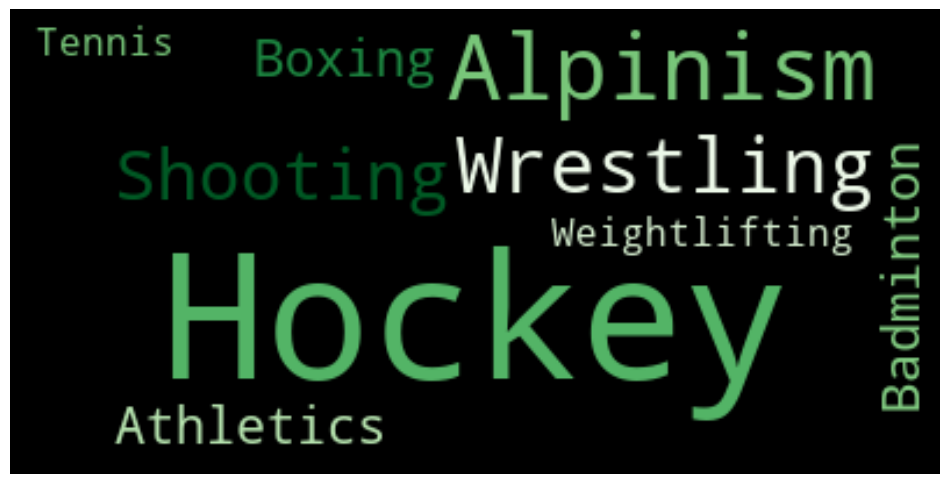

In [56]:
sports = " ".join(n for n in indiawin_df['Sport'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(sports)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Inference
<ul>
    <li>India seems to have won medals across countable sports over the years.</li>
    <li>Hockey accounts for maximum number of medals and this can be validated by the fact that it is the national sport of India.</li>
</ul>


### A Word-Cloud That Graphically Shows The Nations Have Sent Maximum Number Of Athletes Over The Years ###

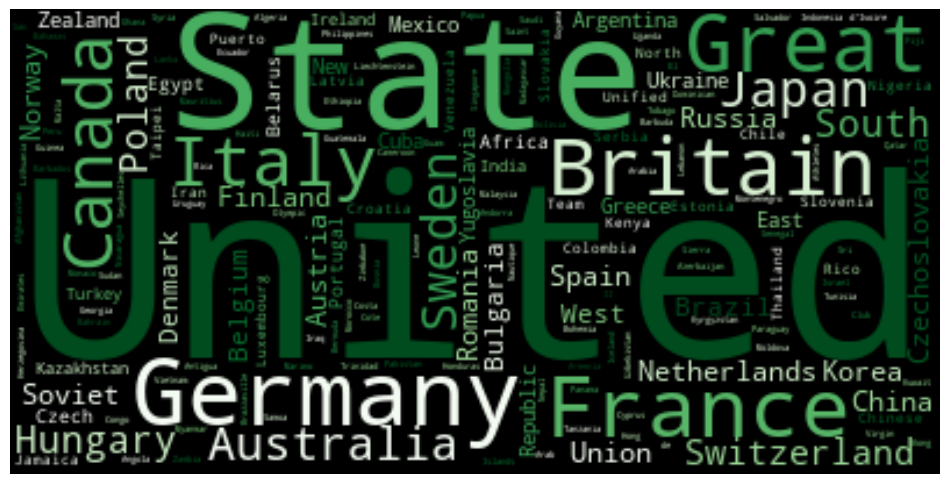

In [42]:
# We will first join all the instances of all the teams into a single string and store it in the variable "countries".
countries = " ".join(n for n in athletes['Team'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

That indicates we have more players from United States,Great Britain, France, Germany, Spain, Italy, Japan, Canada, the Netherlands etc among other places.

## Inferences and Conclusions ##

<ul>
        <li>According to the "Word-Cloud" we compiled, the majority of athletes have represented first-world countries such as the United States, the United Kingdom, France, Germany, Spain, Italy, Japan, Canada, and the Netherlands over the years. This can be credited and explained by their opulent investments in athletes and the sports infrastructure surrounding them.</li>
        <li>Over the years, the overall trends in the number of competitors in the Olympics have progressively drifted upwards. However, there is a substantial drop in the number of participants in three instances (1932, 1956, and 1980). This can be assessed in two parts:
        <ul>
                <li>Because the 1932 Olympics took place during the Great Depression, very few countries sent teams to compete.</li>
                <li>Due to total boycotts by various groups of nations over geo-political reasons, participation in the 1956 and 1980 Olympics was highly restricted.</li>
        </ul>
        </li>
        <li>Since the 1908s, women's participation in the Olympics has been on a positive trajectory. Another interesting fact to note is that the number of female athletes virtually doubled in 1952 compared to the previous Olympics.</li>
        <li>Despite the fact that the number of male and female players has increased since the inaugural edition of the event in 1896, the numbers skew towards male athletes. Without dismissing the element of gender-bias, it can be explained in part by the fact that; most sports historically have centered and evolved around men.</li>
        <li>American athletes brought home the most number of medals per person. From the visualization, it evident that the Americans love Gold medals more in comparison to Silver and Bronze.
                <ul>
                        <li>    Increased sports investment contributed to a progressive improvement in their medal count under President Theodore Roosevelt's leadership beginning in the 1900s, with the exception of the 1906 edition (The 1906 Olympics was intercalated due to which the medal tally from this edition was not officially recognised).
</li>
                </ul>
        </li>
        <li>The majority of India's medals have come from sports like as hockey, wrestling, and shooting, to mention a few. Because hockey is a national sport, it has always had a great deal of significance. Wrestling and archery, on the other hand, have long been important parts of diverse regional cultures. </li>
</ul>